<a href="https://colab.research.google.com/github/HagarIbrahiem/Learning_purposes/blob/main/365__Getting_Insights_through_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EDA Is all about how to generate useful inssights

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns  
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
##load the data
from google.colab import drive
drive.mount('/content/drive')
!ls drive/'My Drive'/ML_Process_Data_Files/Section_6_EDA

Mounted at /content/drive
Aggregated_Metrics_By_Country_And_Subscriber_Status.csv
Aggregated_Metrics_By_Video.csv
All_Comments_Final.csv
Video_Performance_Over_Time.csv


In [ ]:
#read in data 
df_agg = pd.read_csv('drive/My Drive/ML_Process_Data_Files/Section_6_EDA/Aggregated_Metrics_By_Video.csv',encoding='utf-8')
df_agg_country_sub = pd.read_csv('drive/My Drive/ML_Process_Data_Files/Section_6_EDA/Aggregated_Metrics_By_Country_And_Subscriber_Status.csv', encoding='utf-8')
df_ts = pd.read_csv('drive/My Drive/ML_Process_Data_Files/Section_6_EDA/Video_Performance_Over_Time.csv', encoding='utf-8')
df_comments = pd.read_csv('drive/My Drive/ML_Process_Data_Files/Section_6_EDA/All_Comments_Final.csv', encoding='utf-8')

In [ ]:
print( df_agg.columns)
print( df_agg_country_sub.columns)
print( df_ts.columns)
print( df_comments.columns)


Index(['Video', 'Video title', 'Video pub­lish time', 'Com­ments ad­ded',
       'Shares', 'Dis­likes', 'Likes', 'Sub­scribers lost',
       'Sub­scribers gained', 'RPM (USD)', 'CPM (USD)',
       'Av­er­age per­cent­age viewed (%)', 'Av­er­age view dur­a­tion',
       'Views', 'Watch time (hours)', 'Sub­scribers',
       'Your es­tim­ated rev­en­ue (USD)', 'Im­pres­sions',
       'Im­pres­sions click-through rate (%)'],
      dtype='object')
Index(['Video Title', 'External Video ID', 'Video Length', 'Thumbnail link',
       'Country Code', 'Is Subscribed', 'Views', 'Video Likes Added',
       'Video Dislikes Added', 'Video Likes Removed',
       'User Subscriptions Added', 'User Subscriptions Removed',
       'Average View Percentage', 'Average Watch Time', 'User Comments Added'],
      dtype='object')
Index(['Date', 'Video Title', 'External Video ID', 'Video Length',
       'Thumbnail link', 'Views', 'Video Likes Added', 'Video Dislikes Added',
       'Video Likes Removed', 'User Sub

In [ ]:
df_agg.head(2)

,Video,Video title,Video pub­lish time,Com­ments ad­ded,Shares,Dis­likes,Likes,Sub­scribers lost,Sub­scribers gained,RPM (USD),CPM (USD),Av­er­age per­cent­age viewed (%),Av­er­age view dur­a­tion,Views,Watch time (hours),Sub­scribers,Your es­tim­ated rev­en­ue (USD),Im­pres­sions,Im­pres­sions click-through rate (%)
0,Total,NaN,NaN,14197,39640,3902,225021,45790,229241,5.276,11.990,26.61,0:03:25,5568487,317602.3536,183451,29068.652,100954064,3.16
1,4OZip0cgOho,How I Would Learn Data Science (If I Had to St...,"May 8, 2020",907,9583,942,46903,451,46904,6.353,12.835,36.65,0:03:09,1253559,65850.7042,46453,7959.533,26498799,3.14


In [ ]:
df_agg_country_sub.head(2)

,Video Title,External Video ID,Video Length,Thumbnail link,Country Code,Is Subscribed,Views,Video Likes Added,Video Dislikes Added,Video Likes Removed,User Subscriptions Added,User Subscriptions Removed,Average View Percentage,Average Watch Time,User Comments Added
0,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,HK,True,23,1,0,0,2,0,0.67187,39.640348,0
1,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,ME,True,3,0,0,0,0,0,0.49887,29.433333,0


In [ ]:
df_ts.head(2)

,Date,Video Title,External Video ID,Video Length,Thumbnail link,Views,Video Likes Added,Video Dislikes Added,Video Likes Removed,User Subscriptions Added,User Subscriptions Removed,Average View Percentage,Average Watch Time,User Comments Added
0,19 Jan 2022,Kaggle Project From Scratch - Part 2 (Explorat...,KQ80oD_boBM,2191,https://i.ytimg.com/vi/KQ80oD_boBM/hqdefault.jpg,13,0,0,0,0,0,0.069055,151.300154,0
1,19 Jan 2022,Welcome To My Channel | Ken Jee | Data Science,smeFkHwnM_k,51,https://i.ytimg.com/vi/smeFkHwnM_k/hqdefault.jpg,2,0,0,0,1,0,0.471255,24.034000,0


In [ ]:
df_comments.head(2)

,Comments,Comment_ID,Reply_Count,Like_Count,Date,VidId,user_ID
0,Thanks for this video Ken.\n\nI decided to go ...,UgxFZTIzC4UPyhhX_PZ4AaABAg,0,0,2022-01-22T08:13:29Z,xpIFS6jZbe8,user_981
1,Hello ken jee!!! I'm doing a graduation on Com...,Ugx3IYuAufhb932GYQx4AaABAg,0,0,2022-01-22T01:09:46Z,xpIFS6jZbe8,user_213


In [ ]:
## clean Columns Headers by removing non-ascii characters
newCols1 = [ x.encode('ascii','ignore').decode('utf-8') for x in df_agg.columns ]
newCols2 = [ x.encode('ascii','ignore').decode('utf-8') for x in df_agg_country_sub.columns ]
newCols3 = [ x.encode('ascii','ignore').decode('utf-8') for x in df_ts.columns ]
newCols4 = [ x.encode('ascii','ignore').decode('utf-8') for x in df_comments.columns ]


In [ ]:
data_tuples = list(zip( df_agg.columns , newCols1))
df1 = pd.DataFrame(data_tuples, columns=['OldCols','NewCols'])
df1
## no some much changes

,OldCols,NewCols
0,Video,Video
1,Video title,Video title
2,Video pub­lish time,Video publish time
3,Com­ments ad­ded,Comments added
4,Shares,Shares
5,Dis­likes,Dislikes
6,Likes,Likes
7,Sub­scribers lost,Subscribers lost
8,Sub­scribers gained,Subscribers gained
9,RPM (USD),RPM (USD)


In [ ]:
data_tuples = list(zip( df_agg_country_sub.columns , newCols2))
df2 = pd.DataFrame(data_tuples, columns=['OldCols','NewCols'])
df2
## no some much changes

,OldCols,NewCols
0,Video Title,Video Title
1,External Video ID,External Video ID
2,Video Length,Video Length
3,Thumbnail link,Thumbnail link
4,Country Code,Country Code
5,Is Subscribed,Is Subscribed
6,Views,Views
7,Video Likes Added,Video Likes Added
8,Video Dislikes Added,Video Dislikes Added
9,Video Likes Removed,Video Likes Removed


In [ ]:
data_tuples = list(zip( df_ts.columns , newCols3))
df3 = pd.DataFrame(data_tuples, columns=['OldCols','NewCols'])
df3
## no some much changes

,OldCols,NewCols
0,Date,Date
1,Video Title,Video Title
2,External Video ID,External Video ID
3,Video Length,Video Length
4,Thumbnail link,Thumbnail link
5,Views,Views
6,Video Likes Added,Video Likes Added
7,Video Dislikes Added,Video Dislikes Added
8,Video Likes Removed,Video Likes Removed
9,User Subscriptions Added,User Subscriptions Added


In [ ]:
data_tuples = list(zip( df_comments.columns , newCols4))
df4 = pd.DataFrame(data_tuples, columns=['OldCols','NewCols'])
df4
## no some much changes

,OldCols,NewCols
0,Comments,Comments
1,Comment_ID,Comment_ID
2,Reply_Count,Reply_Count
3,Like_Count,Like_Count
4,Date,Date
5,VidId,VidId
6,user_ID,user_ID


In [ ]:
df_agg.describe()

,Com­ments ad­ded,Shares,Dis­likes,Likes,Sub­scribers lost,Sub­scribers gained,RPM (USD),CPM (USD),Av­er­age per­cent­age viewed (%),Views,Watch time (hours),Sub­scribers,Your es­tim­ated rev­en­ue (USD),Im­pres­sions,Im­pres­sions click-through rate (%)
count,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,222.000000,224.000000,2.240000e+02,224.000000,224.000000,224.000000,2.240000e+02,224.000000
mean,126.750000,353.924107,34.839286,2008.919643,217.620536,1608.084821,4.442040,11.442779,34.087277,4.971645e+04,2835.711522,1390.464286,259.537433,9.013573e+05,3.084152
std,948.732371,2736.321694,268.668317,15387.274015,3058.766918,15628.834115,1.789148,3.334781,15.118746,3.810302e+05,21662.566897,12647.246927,2011.119492,6.967916e+06,1.670448
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.439000,5.230000,6.000000e+01,1.068400,-21.000000,0.000000,3.650000e+02,0.490000
25%,18.000000,19.000000,1.000000,163.500000,2.000000,27.000000,3.220750,9.379500,23.602500,3.940000e+03,177.037125,19.750000,12.208250,9.947100e+04,1.925000
50%,37.000000,46.500000,4.000000,342.500000,7.000000,70.000000,4.334500,11.169500,35.120000,8.347500e+03,397.852200,62.500000,32.595500,1.541925e+05,2.895000
75%,66.250000,114.250000,11.000000,716.000000,14.000000,245.500000,5.372250,12.901000,43.462500,1.836875e+04,1145.621400,230.500000,96.814750,2.894885e+05,3.975000
max,14197.000000,39640.000000,3902.000000,225021.000000,45790.000000,229241.000000,10.387000,37.786000,76.600000,5.568487e+06,317602.353600,183451.000000,29068.652000,1.009541e+08,11.510000


In [ ]:
df_agg.describe(percentiles=[0.5] , include = [np.number])

,Com­ments ad­ded,Shares,Dis­likes,Likes,Sub­scribers lost,Sub­scribers gained,RPM (USD),CPM (USD),Av­er­age per­cent­age viewed (%),Views,Watch time (hours),Sub­scribers,Your es­tim­ated rev­en­ue (USD),Im­pres­sions,Im­pres­sions click-through rate (%)
count,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,222.000000,224.000000,2.240000e+02,224.000000,224.000000,224.000000,2.240000e+02,224.000000
mean,126.750000,353.924107,34.839286,2008.919643,217.620536,1608.084821,4.442040,11.442779,34.087277,4.971645e+04,2835.711522,1390.464286,259.537433,9.013573e+05,3.084152
std,948.732371,2736.321694,268.668317,15387.274015,3058.766918,15628.834115,1.789148,3.334781,15.118746,3.810302e+05,21662.566897,12647.246927,2011.119492,6.967916e+06,1.670448
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.439000,5.230000,6.000000e+01,1.068400,-21.000000,0.000000,3.650000e+02,0.490000
50%,37.000000,46.500000,4.000000,342.500000,7.000000,70.000000,4.334500,11.169500,35.120000,8.347500e+03,397.852200,62.500000,32.595500,1.541925e+05,2.895000
max,14197.000000,39640.000000,3902.000000,225021.000000,45790.000000,229241.000000,10.387000,37.786000,76.600000,5.568487e+06,317602.353600,183451.000000,29068.652000,1.009541e+08,11.510000


In [ ]:
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Video                                 224 non-null    object 
 1   Video title                           223 non-null    object 
 2   Video pub­lish time                   223 non-null    object 
 3   Com­ments ad­ded                      224 non-null    int64  
 4   Shares                                224 non-null    int64  
 5   Dis­likes                             224 non-null    int64  
 6   Likes                                 224 non-null    int64  
 7   Sub­scribers lost                     224 non-null    int64  
 8   Sub­scribers gained                   224 non-null    int64  
 9   RPM (USD)                             224 non-null    float64
 10  CPM (USD)                             222 non-null    float64
 11  Av­er­age per­cent­

<AxesSubplot:>

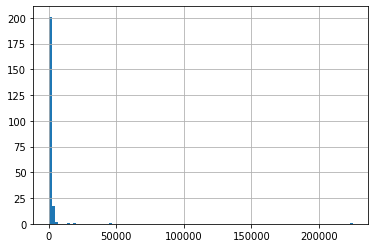

In [ ]:
df_agg.Likes.hist(bins=100)
# there are outliers
#around 20 videos has 100 likes 
#around 10 videos has more than 200000 likes 



<AxesSubplot:>

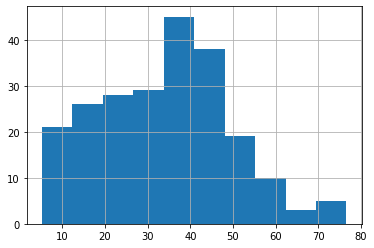

In [ ]:
df_agg['Av­er­age per­cent­age viewed (%)'].hist()
#more normal distribution than Likes , however it's a little bit right skewed
# around 21 vdieos have been seen from 5 - 12 times 
# around 47 vdieos have been seen from 33 - 41 times 


<AxesSubplot:>

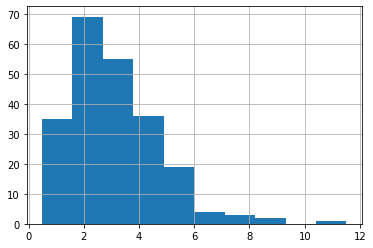

In [ ]:
df_agg['Im­pres­sions click-through rate (%)'].hist()
# u can see around 35 videos located between 0 - 1.7 
# around 70 videos are in 1.7 and 2.3 

We transform data using techniques to make it normally distributed , Hist() are more for detecting data distribution , however boxplot for detecting outliers

<AxesSubplot:>

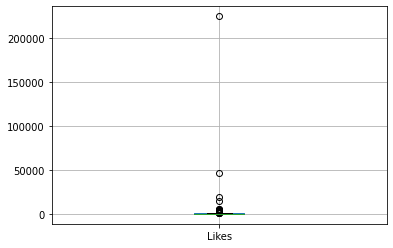

In [ ]:
df_agg.boxplot(['Likes'])
## there're so much outliers away from the Median /green line
## sometime we would remove this outlier , however it may indicate a sucess story of how to make a videos with more lieks

<AxesSubplot:>

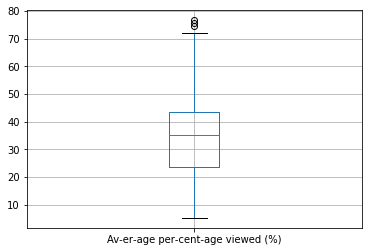

In [ ]:
df_agg.boxplot(['Av­er­age per­cent­age viewed (%)'])
## there are outliers but the vast majority of te data are within the box , we condiser eveythin outside the bracktes as outliers

##How to detect outliers using catgorical data

In [ ]:
# Lets' make this for categoricaal data , lets make ctegorical column
df_agg['Your es­tim­ated rev­en­ue (USD)']

0      29068.652
1       7959.533
2          6.113
3        202.963
4        155.779
         ...    
219        5.103
220        1.849
221        2.728
222        2.900
223        0.003
Name: Your es­tim­ated rev­en­ue (USD), Length: 224, dtype: float64

In [ ]:
from pandas.core.indexes.interval import IntervalIndex
# let's engineer tese categories
bins = IntervalIndex.from_tuples([(0,100), (100,1000), (1000, float('inf'))])
bins

IntervalIndex([(0.0, 100.0], (100.0, 1000.0], (1000.0, inf]], dtype='interval[float64, right]')

In [ ]:
df_agg['rev_buuckets'] = pd.cut( df_agg['Your es­tim­ated rev­en­ue (USD)'],bins )
df_agg['rev_buuckets']

0        (1000.0, inf]
1        (1000.0, inf]
2         (0.0, 100.0]
3      (100.0, 1000.0]
4      (100.0, 1000.0]
            ...       
219       (0.0, 100.0]
220       (0.0, 100.0]
221       (0.0, 100.0]
222       (0.0, 100.0]
223       (0.0, 100.0]
Name: rev_buuckets, Length: 224, dtype: category
Categories (3, interval[float64, right]): [(0.0, 100.0] < (100.0, 1000.0] < (1000.0, inf]]

In [ ]:
rev_buuckets = df_agg['rev_buuckets'].value_counts()
rev_buuckets

(0.0, 100.0]       170
(100.0, 1000.0]     50
(1000.0, inf]        3
Name: rev_buuckets, dtype: int64

<AxesSubplot:>

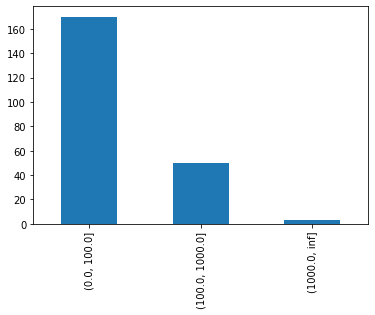

In [ ]:
rev_buuckets.plot.bar()
## around 170 videos achieved from [0-100] revenues
## around 50 videos achieved from [100-1000] revenues
## around 5 videos achieved more than 1000 revenues

<AxesSubplot:>

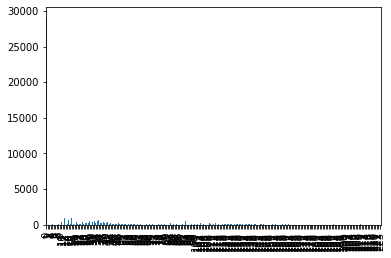

In [ ]:
df_agg['Your es­tim­ated rev­en­ue (USD)'].plot.bar()


## Relationships and MultiVariate plots 

 How Different variables are related to each others , these relations act as an indictors of which features can server tp predict others

### 1-Scatterplot 

In [ ]:
df_agg.columns

Index(['Video', 'Video title', 'Video pub­lish time', 'Com­ments ad­ded',
       'Shares', 'Dis­likes', 'Likes', 'Sub­scribers lost',
       'Sub­scribers gained', 'RPM (USD)', 'CPM (USD)',
       'Av­er­age per­cent­age viewed (%)', 'Av­er­age view dur­a­tion',
       'Views', 'Watch time (hours)', 'Sub­scribers',
       'Your es­tim­ated rev­en­ue (USD)', 'Im­pres­sions',
       'Im­pres­sions click-through rate (%)', 'rev_buuckets'],
      dtype='object')

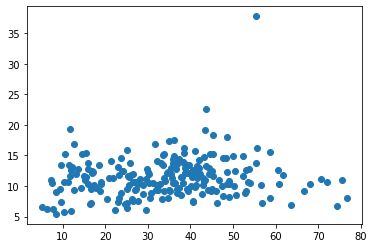

In [ ]:
plt.scatter (df_agg['Av­er­age per­cent­age viewed (%)'] , df_agg['CPM (USD)'])
## No super relation

<AxesSubplot:xlabel='Av\xader\xadage per\xadcent\xadage viewed (%)', ylabel='CPM (USD)'>

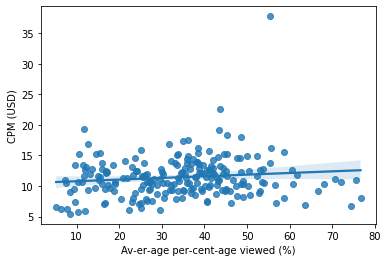

In [ ]:
sns.regplot(x ='Av­er­age per­cent­age viewed (%)', y='CPM (USD)' , data=df_agg)

<AxesSubplot:xlabel='RPM (USD)', ylabel='CPM (USD)'>

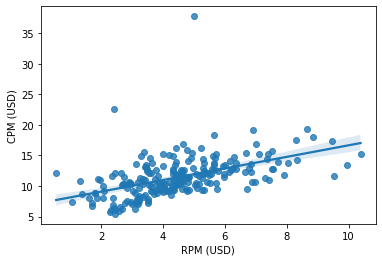

In [ ]:
sns.regplot(x ='RPM (USD)', y='CPM (USD)' , data=df_agg)
## amore stonger relation 

### 2- Correlation matrix 

scatter plot use for only 2 variables , however we have so many features , and wwe want to see relationships between them , thus we use correlation matrix

<AxesSubplot:>

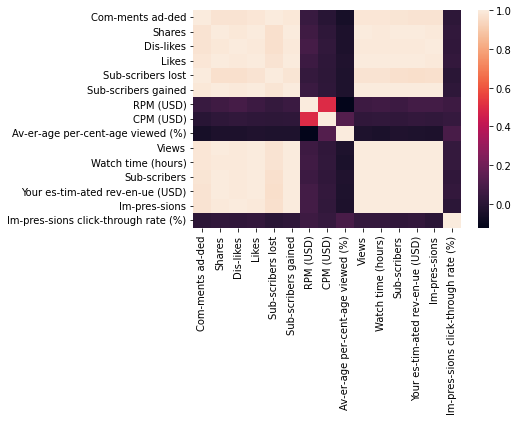

In [ ]:
corr = df_agg.corr()
sns.heatmap(corr)

<AxesSubplot:>

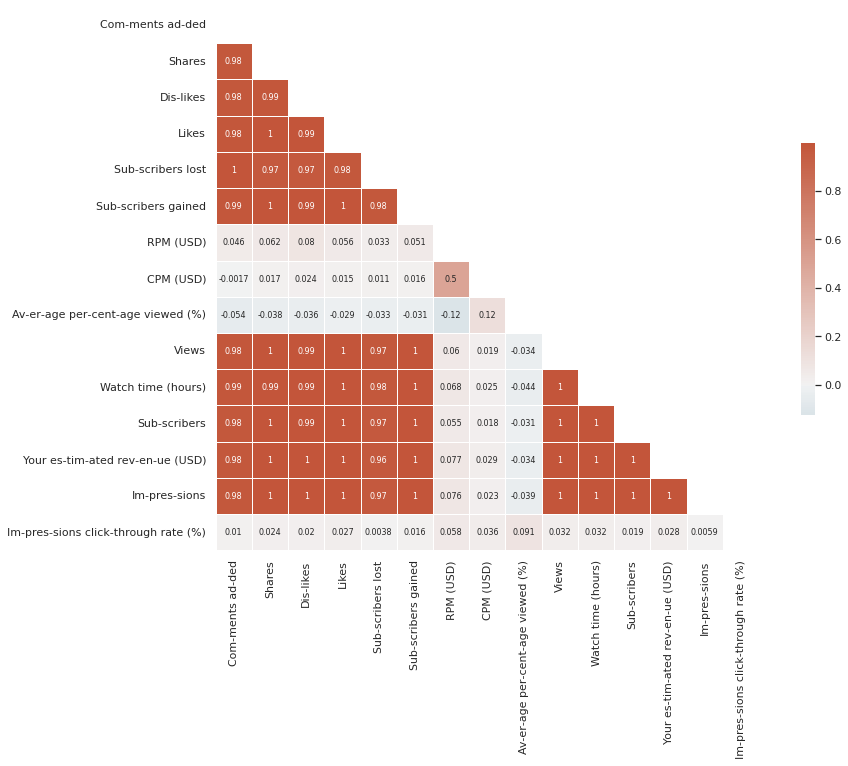

In [ ]:
#Letss improve how it looks
#A better example (formatting used in below chart) - https://seaborn.pydata.org/examples/many_pairwise_correlations.html 

sns.set_theme(style="white")

# Compute the correlation matrix
corr = df_agg.corr()

# Generate a mask for the upper triangle (otherwise this looks like the square we had above and is redundant)
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure 
f, ax = plt.subplots(figsize=(15, 10))

# Generate a custom diverging colormap (choose colors here)
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio 
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, annot_kws={"fontsize":8})

#obviously many of thes variables are HIGHLY correlated. Something we may want to explore is why Average percentage viewed is negatively related to RPM

### 3- pivot table

one way to look to things carefully is strat to to break them down

In [ ]:
df_agg_country_sub.columns

Index(['Video Title', 'External Video ID', 'Video Length', 'Thumbnail link',
       'Country Code', 'Is Subscribed', 'Views', 'Video Likes Added',
       'Video Dislikes Added', 'Video Likes Removed',
       'User Subscriptions Added', 'User Subscriptions Removed',
       'Average View Percentage', 'Average Watch Time', 'User Comments Added'],
      dtype='object')

In [ ]:
pd.pivot_table(df_agg_country_sub , index ='Is Subscribed' , values ='Average View Percentage').sort_values('Average View Percentage')

,Average View Percentage
Is Subscribed,
False,0.326329
True,0.370123


<AxesSubplot:xlabel='Is Subscribed'>

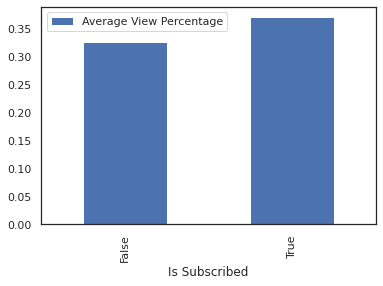

In [ ]:
pd.pivot_table(df_agg_country_sub , index ='Is Subscribed' , values ='Average View Percentage').plot.bar()
## we can see subscribers are watching videos more than non-subscribers viewers

### 4- Line charts

usee to check progress over time

In [ ]:
df_ts['Date'] 

0         19 Jan 2022
1         19 Jan 2022
2         19 Jan 2022
3         19 Jan 2022
4         19 Jan 2022
             ...     
111852    21 Nov 2017
111853    20 Nov 2017
111854    19 Nov 2017
111855    18 Nov 2017
111856     1 Nov 2017
Name: Date, Length: 111857, dtype: object

In [ ]:
## first we need to make sure that our date fiels is in right time format
df_ts['Date'] = pd.to_datetime(df_ts['Date'] )
df_ts['Date'] 

0        2022-01-19
1        2022-01-19
2        2022-01-19
3        2022-01-19
4        2022-01-19
            ...    
111852   2017-11-21
111853   2017-11-20
111854   2017-11-19
111855   2017-11-18
111856   2017-11-01
Name: Date, Length: 111857, dtype: datetime64[ns]

<AxesSubplot:xlabel='Date', ylabel='User Subscriptions Removed'>

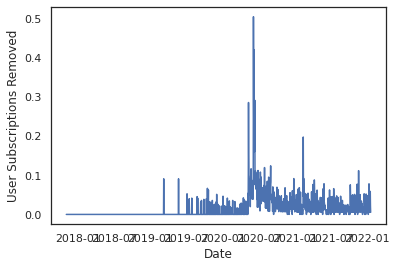

In [ ]:
## check subscriberes removed in case there's a trend here
rm_x_date = pd.pivot_table(df_ts, index='Date',values = 'User Subscriptions Removed')
sns.lineplot(data=rm_x_date,x='Date', y='User Subscriptions Removed')
## there's a video that leaded to a massisve spike of unsubscribes , lets make sure of likes and dislikes

<AxesSubplot:xlabel='Date', ylabel='User Subscriptions Removed'>

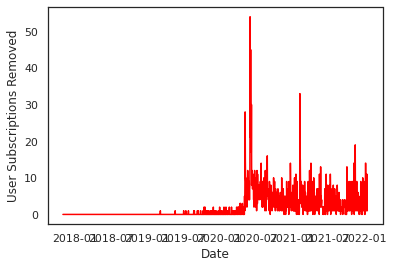

In [ ]:

rm_x_date = pd.pivot_table(df_ts, index='Date',values = 'User Subscriptions Removed', aggfunc ='sum').reset_index()
likes_rm_date = pd.pivot_table(df_ts, index='Date',values='Video Likes Removed', aggfunc ='sum').reset_index()
dislikes_date = pd.pivot_table(df_ts, index='Date',values='Video Dislikes Added', aggfunc ='sum').reset_index()


sns.lineplot(data=rm_x_date,x='Date', y='User Subscriptions Removed' , color='red')
sns.lineplot(data=likes_rm_date,x='Date', y='Video Likes Removed' , color='blue')
sns.lineplot(data=dislikes_date,x='Date', y='Video Dislikes Added' , color='green')

# try to comment each lineplot to check the others

<AxesSubplot:xlabel='Month_Year', ylabel='User Subscriptions Removed'>

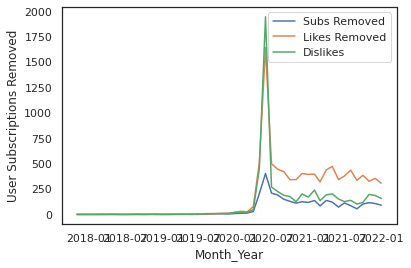

In [ ]:
#This was a bit messy, let's compare it over months instead of days. To get everything on one graph, we need to make it so every video has the same day.
#Just different months and years 
df_ts['Month_Year'] = df_ts['Date'].apply(lambda x: x.replace(day=1))

rm_x_date = pd.pivot_table(df_ts, index='Month_Year',values = 'User Subscriptions Removed', aggfunc ='sum').reset_index()
likes_rm_date = pd.pivot_table(df_ts, index='Month_Year',values='Video Likes Removed', aggfunc = 'sum').reset_index()
dislikes_date = pd.pivot_table(df_ts, index='Month_Year',values='Video Dislikes Added', aggfunc = 'sum').reset_index()

#create 3 line plots with seaborn all on one graph 
sns.lineplot(data=rm_x_date,x='Month_Year', y='User Subscriptions Removed', label ='Subs Removed')
sns.lineplot(data=likes_rm_date,x='Month_Year', y='Video Likes Removed', label = 'Likes Removed')
sns.lineplot(data=dislikes_date,x='Month_Year', y='Video Dislikes Added', label = 'Dislikes')

#it seems like there is a big spike in unsubscribes and negative comments during this period. We should explore this more.
#maybe we should divide these all by views to determine if the spike is only related to a spike in viewership as well.
#or maybe a single video caused a lot of negative things this period 

### Lets answer some more questions

- What topics get the most viewership?
- What do are people asking for in the comments?
- What impacts watch time and click through rate?
- Can we predict if a title will be clickable?
- What thumbnails are most appealing (thumbnail data available in df_agg)
- What is different about my "viral" videos and normal videos
- Who is the core audience of my channel?

#### What topics get the most viewership?

In [ ]:

df_agg.columns

Index(['Video', 'Video title', 'Video pub­lish time', 'Com­ments ad­ded',
       'Shares', 'Dis­likes', 'Likes', 'Sub­scribers lost',
       'Sub­scribers gained', 'RPM (USD)', 'CPM (USD)',
       'Av­er­age per­cent­age viewed (%)', 'Av­er­age view dur­a­tion',
       'Views', 'Watch time (hours)', 'Sub­scribers',
       'Your es­tim­ated rev­en­ue (USD)', 'Im­pres­sions',
       'Im­pres­sions click-through rate (%)', 'rev_buuckets'],
      dtype='object')

In [ ]:
df_agg['Video'].describe()

count       224
unique      224
top       Total
freq          1
Name: Video, dtype: object

In [ ]:
videos_views = pd.pivot_table(df_agg, index='Video title',values = 'Views').sort_values( by='Views',  ascending=False )
videos_views

,Views
Video title,
How I Would Learn Data Science (If I Had to Start Over),1253559
The Best Free Data Science Courses Nobody is Talking About,297222
3 Proven Data Science Projects for Beginners (Kaggle),237467
Beginner Kaggle Data Science Project Walk-Through (Titanic),168183
The Projects You Should Do To Get A Data Science Job,131630
...,...
Most Data Science Hopefuls Overlook This Important Skill,548
Thank You For The Support | What's Next | Ken Jee | Data Science,506
Data Science in Golf: PGA Merchandise Show 2020,482


In [ ]:
videos_views.index = videos_views.index.str.replace('\$\$','')
videos_views

<ipython-input-89-d8627bb5a8c1>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  videos_views.index = videos_views.index.str.replace('\$\$','')


,Views
Video title,
How I Would Learn Data Science (If I Had to Start Over),1253559
The Best Free Data Science Courses Nobody is Talking About,297222
3 Proven Data Science Projects for Beginners (Kaggle),237467
Beginner Kaggle Data Science Project Walk-Through (Titanic),168183
The Projects You Should Do To Get A Data Science Job,131630
...,...
Most Data Science Hopefuls Overlook This Important Skill,548
Thank You For The Support | What's Next | Ken Jee | Data Science,506
Data Science in Golf: PGA Merchandise Show 2020,482


<AxesSubplot:xlabel='Views', ylabel='Video title'>

/usr/local/lib/python3.8/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 127798 (\N{HOT PEPPER}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 127798 (\N{HOT PEPPER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


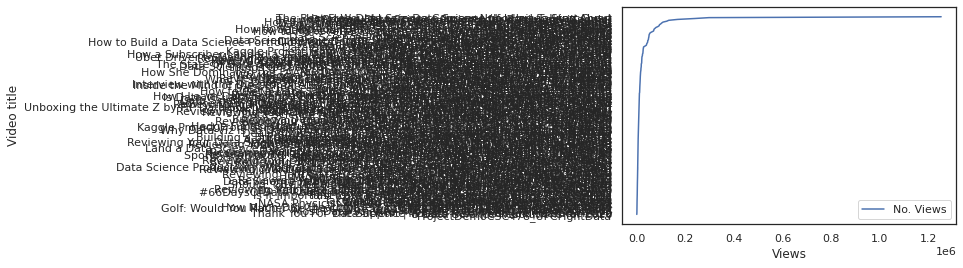

In [ ]:
sns.lineplot(data=videos_views,y='Video title', x='Views', label ='No. Views')


<AxesSubplot:xlabel='Views', ylabel='Video title'>

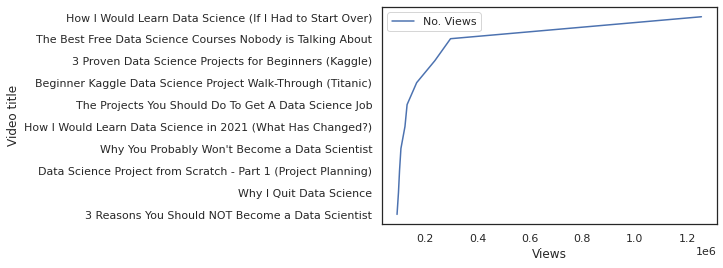

In [ ]:
# display only top 10
sns.lineplot(data=videos_views.head(10),y='Video title', x='Views', label ='No. Views')


#### What do are people asking for in the comments?

In [ ]:
## the df that contains comments
df_comments.columns

Index(['Comments', 'Comment_ID', 'Reply_Count', 'Like_Count', 'Date', 'VidId',
       'user_ID'],
      dtype='object')

In [ ]:
df_comments.head(1)

,Comments,Comment_ID,Reply_Count,Like_Count,Date,VidId,user_ID
0,Thanks for this video Ken.\n\nI decided to go ...,UgxFZTIzC4UPyhhX_PZ4AaABAg,0,0,2022-01-22T08:13:29Z,xpIFS6jZbe8,user_981


In [ ]:
##checking relations between other dfs to get video title  
# df_agg_country_sub['External Video ID']
# df_ts['External Video ID']
# df_comments['VidId']


In [ ]:
df_ts.loc[df_ts['External Video ID'] == 'xpIFS6jZbe8']


,Date,Video Title,External Video ID,Video Length,Thumbnail link,Views,Video Likes Added,Video Dislikes Added,Video Likes Removed,User Subscriptions Added,User Subscriptions Removed,Average View Percentage,Average Watch Time,User Comments Added,month,Month_Year
120,2022-01-19,How I Would Learn Data Science in 2022 (If I H...,xpIFS6jZbe8,734,https://i.ytimg.com/vi/xpIFS6jZbe8/hqdefault.jpg,1878,80,3,2,60,0,0.390613,286.710255,0,2022-01,2022-01-01
241,2022-01-18,How I Would Learn Data Science in 2022 (If I H...,xpIFS6jZbe8,734,https://i.ytimg.com/vi/xpIFS6jZbe8/hqdefault.jpg,1916,95,0,3,91,1,0.393586,288.892005,0,2022-01,2022-01-01
516,2022-01-17,How I Would Learn Data Science in 2022 (If I H...,xpIFS6jZbe8,734,https://i.ytimg.com/vi/xpIFS6jZbe8/hqdefault.jpg,2059,78,2,1,79,0,0.380934,279.605468,0,2022-01,2022-01-01
653,2022-01-16,How I Would Learn Data Science in 2022 (If I H...,xpIFS6jZbe8,734,https://i.ytimg.com/vi/xpIFS6jZbe8/hqdefault.jpg,1887,107,2,5,80,3,0.387028,284.078898,0,2022-01,2022-01-01
837,2022-01-15,How I Would Learn Data Science in 2022 (If I H...,xpIFS6jZbe8,734,https://i.ytimg.com/vi/xpIFS6jZbe8/hqdefault.jpg,1760,103,1,5,78,0,0.371599,272.753502,0,2022-01,2022-01-01
1078,2022-01-14,How I Would Learn Data Science in 2022 (If I H...,xpIFS6jZbe8,734,https://i.ytimg.com/vi/xpIFS6jZbe8/hqdefault.jpg,1675,78,1,3,72,0,0.376831,276.594177,0,2022-01,2022-01-01
1156,2022-01-13,How I Would Learn Data Science in 2022 (If I H...,xpIFS6jZbe8,734,https://i.ytimg.com/vi/xpIFS6jZbe8/hqdefault.jpg,1904,113,4,4,73,3,0.374917,275.189324,0,2022-01,2022-01-01
1453,2022-01-12,How I Would Learn Data Science in 2022 (If I H...,xpIFS6jZbe8,734,https://i.ytimg.com/vi/xpIFS6jZbe8/hqdefault.jpg,1856,94,2,4,64,0,0.392977,288.444837,0,2022-01,2022-01-01
1547,2022-01-11,How I Would Learn Data Science in 2022 (If I H...,xpIFS6jZbe8,734,https://i.ytimg.com/vi/xpIFS6jZbe8/hqdefault.jpg,2137,104,2,2,80,3,0.385254,282.776212,0,2022-01,2022-01-01
1717,2022-01-10,How I Would Learn Data Science in 2022 (If I H...,xpIFS6jZbe8,734,https://i.ytimg.com/vi/xpIFS6jZbe8/hqdefault.jpg,2333,131,4,4,96,0,0.388671,285.284184,0,2022-01,2022-01-01


In [ ]:
df_comments.loc[df_comments['VidId'] == 'xpIFS6jZbe8']


,Comments,Comment_ID,Reply_Count,Like_Count,Date,VidId,user_ID
0,Thanks for this video Ken.\n\nI decided to go ...,UgxFZTIzC4UPyhhX_PZ4AaABAg,0,0,2022-01-22T08:13:29Z,xpIFS6jZbe8,user_981
1,Hello ken jee!!! I'm doing a graduation on Com...,Ugx3IYuAufhb932GYQx4AaABAg,0,0,2022-01-22T01:09:46Z,xpIFS6jZbe8,user_213
3,Great video!!! I started learning Python 8 mon...,UgwrrI7nd3WClsotmHV4AaABAg,0,0,2022-01-21T23:00:37Z,xpIFS6jZbe8,user_3391
8,Watching this for a second time while working ...,Ugx3k4xS-oQi434WINV4AaABAg,0,1,2022-01-21T02:30:26Z,xpIFS6jZbe8,user_287
24,thank you for the high quality videos,Ugwv6FRieqNGO5B9vF54AaABAg,0,0,2022-01-18T16:50:39Z,xpIFS6jZbe8,user_5108
...,...,...,...,...,...,...,...
346,Excellent video to watch at 5am!,Ugy-WLzzS8BdH1TO8Qd4AaABAg,1,1,2021-12-27T13:15:37Z,xpIFS6jZbe8,user_2384
347,I agree it takes up to a year to get the funda...,Ugy1SZPJd6FWvbCnnNJ4AaABAg,2,1,2021-12-27T13:09:43Z,xpIFS6jZbe8,user_2099
348,Happy new year! Thanks for all the videos and ...,Ugwm3mXMMy1dEz4WCBt4AaABAg,1,1,2021-12-27T13:03:52Z,xpIFS6jZbe8,user_2265
349,Hi sir,Ugw1zk1HEcWMg36kkVt4AaABAg,1,1,2021-12-27T13:03:23Z,xpIFS6jZbe8,user_5449


In [ ]:
##Most liked comments
df_comments.sort_values(by='Like_Count' , ascending=False).head(5)

,Comments,Comment_ID,Reply_Count,Like_Count,Date,VidId,user_ID
2644,"Don’t sugarcoat things, Ken. Just tell me I’m ...",UgwS0PxjPVEuuZWwi2p4AaABAg,6,501,2021-04-09T14:36:28Z,sHRq-LshG3U,user_1574
1159,01:20 - 1) Learn programming in python or R \n...,Ugw8EnIPyJ-YthQb6HF4AaABAg,6,346,2021-08-30T00:07:14Z,4OZip0cgOho,user_1411
2655,Despite of all these .. and No matter how man...,UgyaNCHJi_JGyyXj-I14AaABAg,17,317,2021-04-09T13:13:30Z,sHRq-LshG3U,user_3468
9885,4 Main Project Topics\n\n1. Regression\n2. Cla...,Ugwn6ouaeL5CQvOXeMN4AaABAg,3,267,2020-02-18T17:16:14Z,8igH8qZafpo,user_1996
8681,1. you're in it for the Money\n2. you don't ...,UgxM30A41eY9EPJMQPZ4AaABAg,5,255,2020-05-25T05:48:15Z,m5pwx3hgtzM,user_4674


In [ ]:
df_comments.sort_values(by='Like_Count' , ascending=False).head(5)['Comments']

2644    Don’t sugarcoat things, Ken. Just tell me I’m ...
1159    01:20 - 1) Learn programming in python or R \n...
2655    Despite of all these .. and  No matter how man...
9885    4 Main Project Topics\n\n1. Regression\n2. Cla...
8681    1.  you're in it for the Money\n2.  you don't ...
Name: Comments, dtype: object

In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
df_comments.sort_values(by='Like_Count' , ascending=False).head(5)['Comments']

2644                                                                                                                                                                                                                                                                                                                                                                                                                Don’t sugarcoat things, Ken. Just tell me I’m not smart enough.
1159    01:20 - 1) Learn programming in python or R \n01:40 - 2) Learn basic statistics for data science \r\n01:58 - 3) Start projects as soon as you can (Kaggle)\n03:28 - 4) Take notes on what algorithms and packages others use\n03:46 - 5) Learn the source code for the algorithms and try to implement them from scratch\r\n04:48 - 6) Work on more advanced projects where you collect your own data or use advanced concepts like deep learning, nlp, or computer vision.
2655                                                            

####What impacts watch time ?

<AxesSubplot:>

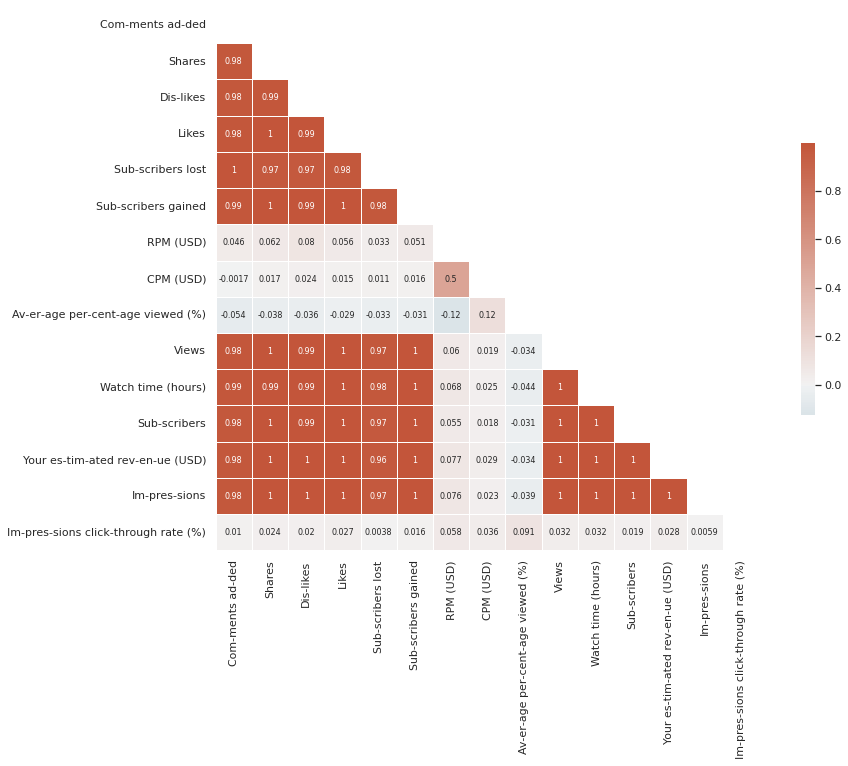

In [ ]:
#Letss improve how it looks
#A better example (formatting used in below chart) - https://seaborn.pydata.org/examples/many_pairwise_correlations.html 

sns.set_theme(style="white")

# Compute the correlation matrix
corr = df_agg.corr()

# Generate a mask for the upper triangle (otherwise this looks like the square we had above and is redundant)
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure 
f, ax = plt.subplots(figsize=(15, 10))

# Generate a custom diverging colormap (choose colors here)
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio 
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, annot_kws={"fontsize":8})

#obviously many of thes variables are HIGHLY correlated. Something we may want to explore is why Average percentage viewed is negatively related to RPM

we can see that watch time is highlt coorelated with 7 features:

- 'Com­ments ad­ded',
- 'Shares', 
- 'Dis­likes',
- 'Likes',
- 'Sub­scribers lost',
- 'Sub­scribers gained'
- Views
       
let's break thigns out

In [ ]:
df_agg.columns

Index(['Video', 'Video title', 'Video pub­lish time', 'Com­ments ad­ded',
       'Shares', 'Dis­likes', 'Likes', 'Sub­scribers lost',
       'Sub­scribers gained', 'RPM (USD)', 'CPM (USD)',
       'Av­er­age per­cent­age viewed (%)', 'Av­er­age view dur­a­tion',
       'Views', 'Watch time (hours)', 'Sub­scribers',
       'Your es­tim­ated rev­en­ue (USD)', 'Im­pres­sions',
       'Im­pres­sions click-through rate (%)', 'rev_buuckets'],
      dtype='object')

In [ ]:
watch_time = pd.pivot_table(df_agg, index='Watch time (hours)',values = 'Com­ments ad­ded').sort_values( by='Com­ments ad­ded',  ascending=False )
watch_time

,Com­ments ad­ded
Watch time (hours),
317602.3536,14197
65850.7042,907
200.2966,412
3687.3387,402
2148.3110,375
...,...
56.5930,3
22.5450,3
19.2752,3


<AxesSubplot:xlabel='Watch time (hours)', ylabel='Com\xadments ad\xadded'>

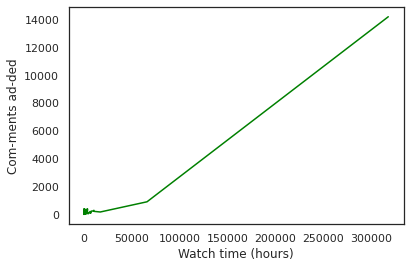

In [ ]:
sns.lineplot(data=watch_time,y='Com­ments ad­ded', x='Watch time (hours)' , color='green')


In [ ]:
bins = IntervalIndex.from_tuples([(0,100), (100,1000),(1000,10000), (10000, float('inf'))])
df_agg['Watch_time'] = pd.cut( df_agg['Watch time (hours)'],bins )
df_agg['Watch_time']





0         (10000.0, inf]
1         (10000.0, inf]
2        (100.0, 1000.0]
3      (1000.0, 10000.0]
4      (1000.0, 10000.0]
             ...        
219         (0.0, 100.0]
220         (0.0, 100.0]
221         (0.0, 100.0]
222         (0.0, 100.0]
223         (0.0, 100.0]
Name: Watch_time, Length: 224, dtype: category
Categories (4, interval[float64, right]): [(0.0, 100.0] < (100.0, 1000.0] < (1000.0, 10000.0] <
                                           (10000.0, inf]]

In [ ]:
watch_time = pd.pivot_table(df_agg, index='Watch_time',values = 'Com­ments ad­ded').sort_values( by='Com­ments ad­ded' )
watch_time

,Com­ments ad­ded
Watch_time,
"(0.0, 100.0]",13.485714
"(100.0, 1000.0]",48.726562
"(1000.0, 10000.0]",105.196429
"(10000.0, inf]",3158.400000


<AxesSubplot:xlabel='Watch_time'>

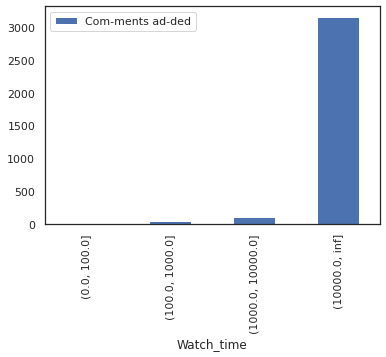

In [ ]:
watch_time.plot.bar()

There is strong relations between the comments added and the watch hours 

---



In [ ]:
watch_time = pd.pivot_table(df_agg, index='Watch_time',values = 'Dis­likes').sort_values( by='Dis­likes' )
watch_time

,Dis­likes
Watch_time,
"(0.0, 100.0]",2.885714
"(100.0, 1000.0]",5.914062
"(1000.0, 10000.0]",34.000000
"(10000.0, inf]",1008.400000


<AxesSubplot:xlabel='Watch_time'>

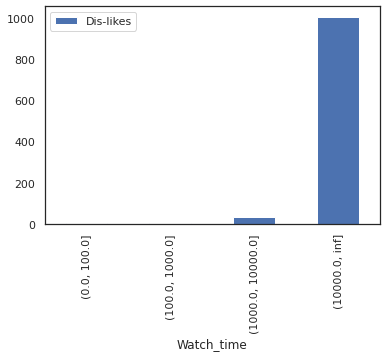

In [ ]:
watch_time.plot.bar()

##Resources

- https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15 